In [1]:
# Importing Python Libraries
import pandas as pd
import numpy as np

In [3]:
# Reading dataset into Python environment
data = pd.read_csv("https://raw.githubusercontent.com/Pawa-IT-Solutions/data-engineer-test/main/student_performance.csv")

# Preview the first few rows of the dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,maasai,university,free/reduced,none,20,58,78
1,female,kamba,polytechnic,free/reduced,completed,18,29,18
2,female,luo,kcpe,standard,none,35,31,59
3,male,luhya,university,standard,none,96,79,39
4,female,maasai,polytechnic,standard,completed,84,75,24


In [127]:
#Checking if the data has any null values on all columns
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [128]:
# Checking if all columns data types are correctly labelled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [129]:
# Describe the basic statistics and Transpose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,50.089,28.714937,0.0,25.0,51.0,75.00,99.0
reading score,1000.0,50.629,28.826591,0.0,26.0,51.0,75.00,99.0
writing score,1000.0,49.252,29.028213,0.0,24.0,49.0,74.25,99.0


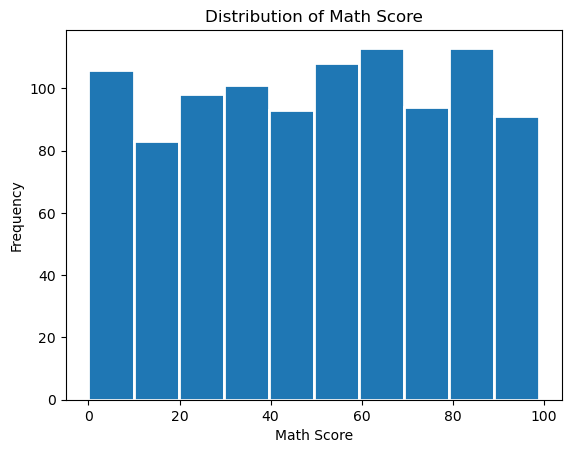

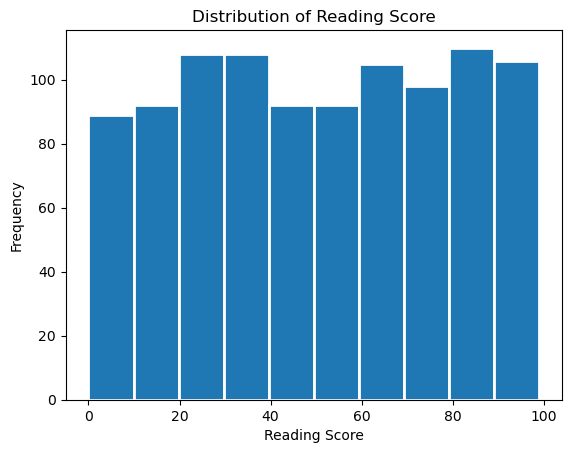

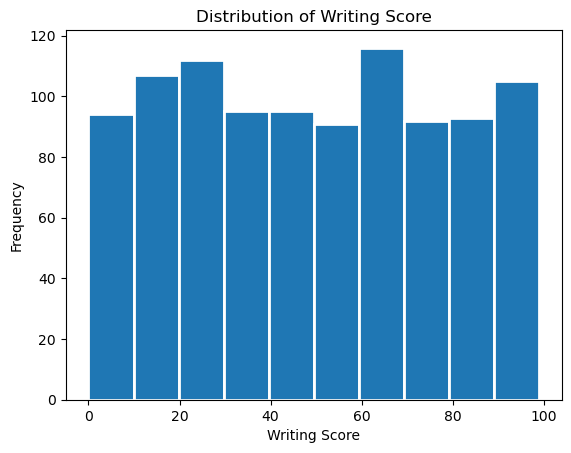

In [130]:
#Visualize the Distribution of exam scores using histograms
import matplotlib.pyplot as plt

# Store the exam scores as python variables
math_score= data['math score']
reading_score=data['reading score']
writing_score=data['writing score']


#Plotting the histograms
plt.hist(math_score, bins=10, edgecolor='white', linewidth=2) #Plotting Math score data
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Score')
plt.show()

plt.hist(reading_score, bins=10, edgecolor='white', linewidth=2)
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Score')
plt.show()

plt.hist(writing_score, bins=10, edgecolor='white', linewidth=2)
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Score')
plt.show()

In [131]:
# Calculate the average store of each student
#--
# Create a variable that filters the scores
scores=data[['math score', 'reading score', 'writing score']]

# Creating average score per student
avg_score= round(scores.mean(axis=1),2)


#create a new column for the averaged scores
data["avg_score"]= avg_score


print(f"Average score per student is as follows :\n{avg_score}")




Average score per student is as follows :
0      52.00
1      21.67
2      41.67
3      71.33
4      61.00
       ...  
995    33.67
996    44.00
997    63.00
998    45.33
999    26.33
Length: 1000, dtype: float64


In [132]:
# Average math score for male students
avg_male_mathscore=data[data.gender.isin(['male'])][['math score']].mean()

print(f"Average Male",avg_male_mathscore)

Average Male math score    50.129032
dtype: float64


In [133]:
#Calculate the percentage of students who completed Test Preparation Course

# First find the number ticked as completed
sum_completed = data[data['test preparation course'] == "completed"].shape[0]

# Calculate the percentage of total students
percentage= (sum_completed/len(data))*100

print(f"Percentage of students who completed the Test Preparation Course: {percentage} %")

Percentage of students who completed the Test Preparation Course: 49.9 %


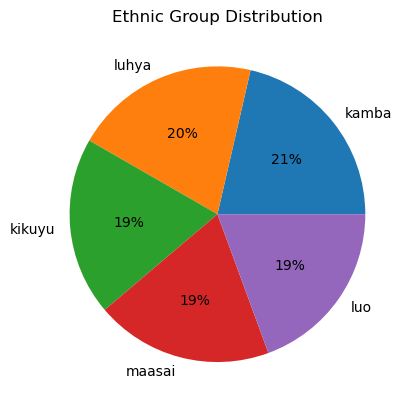

In [134]:
# Pie chart on different ethnicities in the class
# Prepare data
ethnic_group= data['race/ethnicity']
ethnicgroup_nos= data['race/ethnicity'].value_counts()

# PLot a pie chart
plt.pie(ethnicgroup_nos, labels=ethnicgroup_nos.index, autopct='%.0F%%')
plt.title('Ethnic Group Distribution')
plt.show()